In [44]:
#import lib
from urllib.request import urlopen
import requests
import json
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib.request
import selenium

from matplotlib import rcParams
from matplotlib import cm, colors, _cm
import matplotlib.pyplot as plt
import matplotlib as mpl

import scipy.stats

In [ ]:
#Reading kfc
url = 'https://www.kfckorea.com/kfc/interface/selectStoreList'

kfc_total = pd.DataFrame()
# make empty DataFrame

# 저도 모르겠는데 KFC가 코드를 이상하게 짜서 이 과정이 한번 필요합니다.
data = {
                'device': 'WEB',
                'sido_search': 'A0181',
                'gugun_search': 'A018001',
                'show_search': 'Y',
                'initYn': 'N',
                'rows': '20'
                }


resp = requests.post(url, data=data)
kfc_df = pd.DataFrame(resp.json()['rows'])
kfc_df["store_old_address"]
kfc_loc = pd.DataFrame(kfc_df['store_old_address'].apply(lambda v: v.split()[:2]).tolist(),
                                          columns=('d1', 'd2'))
kfc_total = pd.concat([kfc_total, kfc_loc])

# -----------------------------------------------------------

# 진짜 kfc위치를 저장하는 코드
for sido in range(1,18):
    sido_code = 'A018' + str(sido)
        
    for gugun in range(1,45):
        gugun_code = sido_code + '00' + str(gugun)

        data = {
                'device': 'WEB',
                'sido_search': sido_code,
                'gugun_search': gugun_code,
                'show_search': 'Y',
                'initYn': 'N',
                'rows': '20'
                }
        try:
            resp = requests.post(url, data=data)
            kfc_df = pd.DataFrame(resp.json()['rows'])
            kfc_df["store_old_address"]

            kfc_loc = pd.DataFrame(kfc_df['store_old_address'].apply(lambda v: v.split()[:2]).tolist(),
                                          columns=('d1', 'd2'))
            kfc_total = pd.concat([kfc_total, kfc_loc])
        except KeyError:
            continue



kfc_total.to_csv("kfc_total.csv")
files.download("kfc_total.csv")

kfc_total.tail()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,d1,d2
0,충남,아산시
0,충남,천안시
0,충남,천안시
1,충남,천안시
0,충북,청주시


In [2]:
kfc_total = pd.read_csv("kfc_total.csv")
kfc_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  136 non-null    int64 
 1   d1          136 non-null    object
 2   d2          136 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.3+ KB


In [3]:
kfc_total['d1'].unique()
d1_aliases = """서울:서울특별시 충남:충청남도 강원:강원도 경기:경기도 충북:충청북도 경남:경상남도 경북:경상북도
전남:전라남도 전북:전라북도 제주도:제주특별자치도 제주:제주특별자치도 대전:대전광역시 대구:대구광역시 인천:인천광역시
광주:광주광역시 울산:울산광역시 부산:부산광역시"""

d1_aliases = dict(aliasset.split(':') for aliasset in d1_aliases.split())
kfc_total['d1'] = kfc_total['d1'].apply(lambda v: d1_aliases.get(v, v))

kfc_total['d1'].unique()

array(['서울특별시', '경기도', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '강원도', '경상남도', '경상북도', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도'], dtype=object)

In [4]:
kfc_total['d2'].unique()

array(['서초구', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구',
       '노원구', '남양주시', '부천시', '성남시', '수원시', '안산시', '안성시', '안양시', '양주시',
       '오산시', '용인시', '의정부시', '이천시', '파주시', '평택시', '하남시', '화성시', '금정구',
       '남구', '부산진구', '북구', '사상구', '사하구', '달서구', '서구', '수성구', '중구', '계양구',
       '미추홀구', '남동구', '부평구', '연수구', '광산구', '동구', '유성구', '가람동', '원주시',
       '춘천시', '고양시', '광명시', '구리시', '군포시', '김포시', '김해시', '양산시', '창원시',
       '경산시', '구미시', '목포시', '순천시', '전주시', '서귀포시', '당진시', '아산시', '천안시',
       '청주시'], dtype=object)

In [ ]:
# 버거킹!

url = 'https://www.burgerking.co.kr/BKR0001.json'
resp = requests.get(url)
json = resp.json()
bgk_tbl = pd.DataFrame(json['body']['storeList'])

bgk_tbl.to_csv("bgk_tbl.csv")
files.download("bgk_tbl.csv")
bgk_tbl

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,STOR_COORD_Y,KCP_SITE_KEY,DLV_EXPT_TIME,ADDR_2,PARKING_YN,STOR_CD,KAKAO_PAY_CID,DLV_FNSH_TIME,SELLER_KEY,KORD_FNSH_TIME,STOR_STATUS,KORD_YN,KMON_FNSH_TIME,KMON_YN,ORD_MIN_PRC,KCP_SITE_CD,OPER_24_YN,OPER_YN,KING_ORDER_STATE_OF_WEEK_DAY,TEL_NO,DLV_START_TIME,NPAY_CHAIN_ID,KORD_START_TIME,STOR_NM,DIRVE_TH,STOR_COORD_X,ADDR_1,PRODUCT_ID,KMON_START_TIME,DISTANCE,DLVYN,STORE_TIME,CP_ID,HAS_NIGHT_STORE,KING_ORDER_START_DT,KING_ORDER_FNSH_DT,DELIVERY_START_DT,DELIVERY_FNSH_DT
0,35.8179358786,4Di5.1zP.K.UjHQly2npM0K__,85~95,,0,00000242,C457670128,2359,BKR00000242,2345,1,1,0000,0,12000,B1884,1,Y,"[{""dayOfWeek"":""1"",""kingOrderCloseTime"":""23:45""...",053-632-0889,0000,L1F6NlU1b3dZYTd,0800,상인SK점,1,128.5354696198,대구광역시 달서구 월배로 200,BKR00000242_EASYP,0000,0.0,1,Cleaning Day(Close): 매월 넷째주 월요일 02:00~06:00,BKR00000242,N,,,,
1,37.5164892143,3-ztm9OSPk0pa3MfpyHQU.l__,55~65,,0,00000245,C458820130,2359,BKR00000245,2345,1,1,0000,0,12000,B1878,0,Y,"[{""dayOfWeek"":""1"",""kingOrderCloseTime"":""23:45""...",032-506-3643,1000,ZVI0bytRd0hKenJ,1000,삼산SK점,1,126.7318419734,인천광역시 부평구 장제로 347,BKR00000245_EASYP,0000,0.0,1,연중무휴 (10:00~24:00),BKR00000245,N,,,,
2,37.3631656087,14dN7XqpFIYVhgfg.rPzO7L__,70~80,,0,00000032,C422250072,2259,BKR00000032,2345,1,1,,0,12000,B1874,1,Y,"[{""dayOfWeek"":""1"",""kingOrderOpenYn"":""Y"",""kingO...",031-716-3737,1000,bnBaTTk5WDdTWVk,0800,분당상록점,0,127.1144372171,경기도 성남시 분당구 정자로 88,BKR00000032_EASYP,,0.0,1,Cleaning Day(Close): 매월 첫째주 월요일 02:00~06:00,BKR00000032,Y,,,,
3,35.1551012,30JnNQT2pxg6HYdK6sxTkp7__,75~85,,0,00000045,C423070073,2259,BKR00000045,2345,1,1,,0,12000,G6458,1,Y,"[{""dayOfWeek"":""1"",""kingOrderOpenYn"":""Y"",""kingO...",051-818-9836,1000,RFd1Q2djODFReWR,0900,부산태화점,0,129.0597308,부산광역시 부산진구 서전로10번길 64,BKR00000045_EASYP,,0.0,1,Cleaning Day(Close): 매월 넷째주 월요일 02:00~06:00,BKR00000045,Y,,,,
4,37.5140993435,3Jcd63LLfduDh-YWlSNS3j6__,85~95,,0,00000055,C424520075,2359,BKR00000055,2345,1,1,,0,12000,B2977,0,Y,"[{""dayOfWeek"":""1"",""kingOrderOpenYn"":""Y"",""kingO...",02-816-2176,0900,QTdjeVhLYlVvZ3J,0900,노량진점,0,126.9448245088,서울특별시 동작구 노량진로 169,BKR00000055_EASYP,,0.0,1,연중무휴 (09:00~24:00),BKR00000055,N,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,37.6132354,2azrloKbqOfHaqBt6hccA8f__,40~50,,0,00000503,CT07698753,2359,BKR00000503,2345,1,1,,0,12000,AFDGT,0,Y,,070-7462-8588,1000,,0900,고양행신역점,0,126.8337261,경기도 고양시 덕양구 충장로 3,BKR00000503_EASYP,,0.0,1,연중무휴 (09:00~24:00),BKR00000503,N,20210811,,20210811,
416,35.8379972,1DjK1DmI8FSu.Tv0VXrPeYL__,55~65,,0,00000496,CT62710745,2359,BKR00000496,2345,1,1,,0,12000,AC2BZ,0,Y,,070-7462-8556,0900,bkR0eDJaWDhiZGU,0900,전주인후DT점,1,127.1606828,전라북도 전주시 덕진구 안덕원로 307,BKR00000496_EASYP,,0.0,1,연중무휴 (09:00~24:00),BKR00000496,N,,,,
417,37.6219901,1NyZ0YMy..ZClHaXSVBg4MN__,45~55,,0,00000495,CT62710743,2359,BKR00000495,2345,1,1,,0,12000,AC2BY,0,Y,,070-7462-8555,1000,OVhIbjdaSkl6Zk1,0900,화랑대역점,0,127.0866513,서울특별시 노원구 노원로 3,BKR00000495_EASYP,,0.0,1,연중무휴 (09:00~24:00),BKR00000495,N,,,,
418,37.5882095,0W.B5v0EDSfHyA0gScJ.yBT__,65~75,,0,00000498,CT62710747,2359,BKR00000498,2359,1,1,,0,12000,AC2DI,0,Y,,070-7462-8558,1000,ZG1PVnliT2lFbFM,0900,면목역점,0,127.0879653,서울특별시 중랑구 겸재로 180,BKR00000498_EASYP,,0.0,1,연중무휴 (09:00~24:00),BKR00000498,N,,,,


In [5]:
bgk_tbl = pd.read_csv("bgk_tbl.csv")
bgk_tbl['ADDR_1'].tail()

415        경기도 고양시 덕양구 충장로 3
416    전라북도 전주시 덕진구 안덕원로 307
417          서울특별시 노원구 노원로 3
418        서울특별시 중랑구 겸재로 180
419        경기 평택시 평택로32번길 34
Name: ADDR_1, dtype: object

In [6]:
bgk_total = pd.DataFrame()
for addr in bgk_tbl['ADDR_1'].values:
    addr = addr.strip().split(' ')
    d1, d2 = addr[0], addr[1]

    bgk_df = pd.DataFrame({'d1':[addr[0]], 'd2':[addr[1]]})
    bgk_total = pd.concat([bgk_total, bgk_df])

bgk_total.head()

,d1,d2
0,대구광역시,달서구
0,인천광역시,부평구
0,경기도,성남시
0,부산광역시,부산진구
0,서울특별시,동작구


In [7]:
bgk_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   d1      420 non-null    object
 1   d2      420 non-null    object
dtypes: object(2)
memory usage: 9.8+ KB


In [8]:
bgk_total['d1'].unique()
d1_aliases = """서울:서울특별시 충남:충청남도 강원:강원도 경기:경기도 충북:충청북도 경남:경상남도 경북:경상북도
전남:전라남도 전북:전라북도 제주도:제주특별자치도 제주:제주특별자치도 대전:대전광역시 대구:대구광역시 인천:인천광역시
광주:광주광역시 울산:울산광역시 부산:부산광역시"""

d1_aliases = dict(aliasset.split(':') for aliasset in d1_aliases.split())
bgk_total['d1'] = bgk_total['d1'].apply(lambda v: d1_aliases.get(v, v))

bgk_total['d1'].unique()

array(['대구광역시', '인천광역시', '경기도', '부산광역시', '서울특별시', '강원도', '전라북도', '대전광역시',
       '울산광역시', '광주광역시', '경상북도', '경상남도', '전라남도', '충청남도', '충청북도',
       '세종특별자치시', '제주특별자치도', '서울시'], dtype=object)

In [9]:
bgk_total['d2'].unique()

array(['달서구', '부평구', '성남시', '부산진구', '동작구', '도봉구', '화성시', '영등포구', '시흥시',
       '서대문구', '수원시', '종로구', '마포구', '남구', '강동구', '용인시', '계양구', '강북구',
       '춘천시', '군산시', '강남구', '송파구', '구로구', '의정부시', '북구', '서구', '김포시',
       '전주시', '안양시', '속초시', '유성구', '중구', '파주시', '고양시', '연수구', '동구', '과천시',
       '양천구', '김천시', '수성구', '정읍시', '성북구', '창원시', '동대문구', '거제시', '광양시',
       '서산시', '해운대구', '포항시', '남동구', '천안시', '연제구', '오산시', '무안군', '금정구',
       '관악구', '부천시', '구미시', '나주시', '강릉시', '이천시', '목포시', '경주시', '구리시',
       '은평구', '광진구', '김해시', '서초구', '평택시', '강서구', '사상구', '경산시', '안동시',
       '익산시', '남양주시', '광명시', '중랑구', '노원구', '하남시', '광산구', '금천구', '진천군',
       '동래구', '기장군', '성동구', '보듬5로', '광주시', '양산시', '청주시', '충주시', '안산시',
       '청원군', '원주시', '상주시', '순천시', '동두천시', '홍천군', '안성시', '달성군', '용산구',
       '제주시', '여수시', '당진시', '어울로', '진주시', '사하구', '사천시', '한누리대로', '양평군',
       '홍성군', '양주시', '영주시', '보령시', '미추홀구', '군포시', '포천시', '보듬3로', '음성군',
       '세종로'], dtype=object)

In [76]:
# 맥도날드!!
MCDONALDS_URL = 'http://www.mcdonalds.co.kr/www/kor/findus/district.do?sSearch_yn=Y&skey=2&pageIndex={page}&skeyword={location}'

In [78]:
def search_mcdonalds_stores_one_page(location, page):
    response = urllib.request.urlopen(
        MCDONALDS_URL.format(location=urllib.parse.quote(location.encode('utf-8')), page=page))
    mcd_data = response.read().decode('utf-8')
    soup = bs4.BeautifulSoup(mcd_data)
    
    ret = []
    for storetag in soup.findAll('dl', attrs={'class': 'clearFix'}):
        storeaddr = storetag.findAll('dd', attrs={'class': 'road'})[0].contents[0].split(']')[1]
        storeaddr_district = storeaddr.split()[:2]
        ret.append(storeaddr_district)

    return pd.DataFrame(ret, columns=('d1', 'd2')) if ret else None

# 여러 페이지를 쭉 찾아서 안 나올 때 까지 합친다.
def search_mcdonalds_stores(location):
    from itertools import count
    
    found = []
    for pg in count():
        foundinpage = search_mcdonalds_stores_one_page(location, pg+1)
        if foundinpage is None:
            break
        found.append(foundinpage)

    return pd.concat(found)

In [113]:

mac_total = pd.DataFrame()
for page in range(1,82):
    data = {'page': page}
    resp = requests.post('https://www.mcdonalds.co.kr/kor/store/list.do', data = data)

    soup = BeautifulSoup(resp.text, 'lxml')

    for address in soup.find_all('dd', class_='road'):
        mac_df_temp = pd.DataFrame({'d1' : [address.get_text().split(' ')[0]],
                                    'd2' : [address.get_text().split(' ')[1]]})
        mac_total = pd.concat([mac_df, mac_df_temp])

mac_total.to_csv("mac_total.csv")
files.download("mac_total.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
mac_total = pd.read_csv("mac_total.csv")
mac_total.drop(['Unnamed: 0'], axis=1, inplace=True)
mac_total.head()

,d1,d2
0,경기,고양시
1,서울,중구
2,서울,노원구
3,경북,영천시
4,대구,동구


In [11]:
d1_aliases = """서울:서울특별시 충남:충청남도 강원:강원도 경기:경기도 충북:충청북도 경남:경상남도 경북:경상북도
전남:전라남도 전북:전라북도 제주도:제주특별자치도 제주:제주특별자치도 대전:대전광역시 대구:대구광역시 인천:인천광역시
광주:광주광역시 울산:울산광역시 부산:부산광역시 서울시:서울특별시"""

d1_aliases = dict(aliasset.split(':') for aliasset in d1_aliases.split())
mac_total['d1'] = mac_total['d1'].apply(lambda v: d1_aliases.get(v, v))

mac_total['d1'].unique()

array(['경기도', '서울특별시', '경상북도', '대구광역시', '경상남도', '전라남도', '제주특별자치도', '충청남도',
       '인천광역시', '부산광역시', '전라북도', '강원도', '광주광역시', '충청북도', '울산광역시', '대전광역시'],
      dtype=object)

In [12]:
mac_total['d2'].unique()

array(['고양시', '중구', '노원구', '영천시', '동구', '진주시', '용인시', '창원시', '광양시',
       '서귀포시', '홍성군', '계양구', '송파구', '사하구', '논산시', '마포구', '평택시', '강서구',
       '경주시', '무안군', '종로구', '수영구', '안산시', '정읍시', '구리시', '강남구', '기장군',
       '서대문구', '성남시', '춘천시', '화성시', '보령시', '구미시', '사상구', '김해시', '동해시',
       '밀양시', '영등포구', '광명시', '부산진구', '남구', '구로구', '군포시', '강동구', '서산시',
       '부천시', '달성군', '아산시', '제천시', '강북구', '북구', '이천시', '남동구', '수원시',
       '해운대구', '동래구', '천안시', '제주시', '금천구', '양산시', '하남시', '당진시', '도봉구',
       '영도구', '양주시', '김포시', '울주군', '동작구', '여수시', '동두천시', '연수구', '순천시',
       '전주시', '달서구', '청주시', '금정구', '목포시', '부평구', '유성구', '서구', '익산시',
       '남양주시', '군산시', '대덕구', '의왕시', '광산구', '동대문구', '양천구', '용산구', '서초구',
       '성북구', '관악구', '중랑구', '안양시', '연제구', '광진구', '포항시', '성동구', '시흥시',
       '은평구', '수성구', '과천시', '의정부시', '강릉시', '포천시', '오산시', '거제시', '안성시',
       '속초시', '원주시', '충주시', '사천시', '통영시', '미추홀구', '김천시'], dtype=object)

In [13]:
# BMK!!

B = bgk_total.apply(lambda r: r['d1'] + ' ' + r['d2'], axis=1).value_counts()
M = mac_total.apply(lambda r: r['d1'] + ' ' + r['d2'], axis=1).value_counts()
K = kfc_total.apply(lambda r: r['d1'] + ' ' + r['d2'], axis=1).value_counts()

In [14]:
BMK = pd.DataFrame({'B': B, 'M': M, 'K': K}).fillna(0)
BMK['total'] = BMK.sum(axis=1)
BMK = BMK.sort_values('total', ascending=False)
BMK.head(10)

,B,M,K,total
서울특별시 강남구,11.0,11.0,7.0,29.0
경기도 수원시,12.0,11.0,5.0,28.0
경기도 고양시,11.0,11.0,5.0,27.0
경기도 성남시,8.0,8.0,7.0,23.0
경상남도 창원시,7.0,12.0,1.0,20.0
경기도 용인시,5.0,9.0,4.0,18.0
경기도 부천시,6.0,6.0,4.0,16.0
대구광역시 달서구,4.0,8.0,3.0,15.0
전라북도 전주시,7.0,6.0,2.0,15.0
충청북도 청주시,7.0,6.0,1.0,14.0


In [205]:
LOTTERIA_URL = 'http://www.lotteria.com/Shop/Shop_Ajax.asp'
LOTTERIA_VALUES = {
    'Page': 1, 'PageSize': 2000, 'BlockSize': 2000,
    'SearchArea1': '', 'SearchArea2': '', 'SearchType': "TEXT",
    'SearchText': '', 'SearchIs24H': '', 'SearchIsWifi': '',
    'SearchIsDT': '', 'SearchIsHomeService': '', 'SearchIsGroupOrder': '',
    'SearchIsEvent': ''}
LOTTERIA_HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.10; rv:12.0) Gecko/20100101',
    'Host': 'www.lotteria.com',
    'Accept': 'text/html, */*; q=0.01',
    'Accept-Language': 'en-us,en;q=0.5',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'X-Requested-With': 'XMLHttpRequest',
    'Referer': 'http://www.lotteria.com/Shop/Shop_List.asp?Page=1&PageSize=2000&BlockSize=2000&Se'
               'archArea1=&SearchArea2=&SearchType=TEXT&SearchText=&SearchIs24H=&SearchIsWifi=&Se'
               'archIsDT=&SearchIsHomeService=&SearchIsGroupOrder=&SearchIsEvent=',
}

In [206]:
postdata = urllib.parse.urlencode(LOTTERIA_VALUES).encode('utf-8')
req = urllib.request.Request(LOTTERIA_URL, postdata, LOTTERIA_HEADERS)
response = urllib.request.urlopen(req)
ltr_data = response.read().decode('utf-8')
soup = BeautifulSoup(ltr_data, 'lxml')

In [207]:
id_list = []
for id in range(0,2615,2):
    id_list.append(str(soup.find_all('a')[id])[28:32])

id_list


['4203',
 '4198',
 '4204',
 '4202',
 '4197',
 '4200',
 '4195',
 '4196',
 '4188',
 '4199',
 '4192',
 '4189',
 '4190',
 '4191',
 '4193',
 '4194',
 '4149',
 '4185',
 '4182',
 '4183',
 '4039',
 '4180',
 '4184',
 '4177',
 '4181',
 '4147',
 '4172',
 '4148',
 '4114',
 '4176',
 '4175',
 '4178',
 '4171',
 '4145',
 '4179',
 '4146',
 '4162',
 '4161',
 '4164',
 '4167',
 '4163',
 '4116',
 '4160',
 '4166',
 '4159',
 '4157',
 '4152',
 '4144',
 '4151',
 '4119',
 '4141',
 '4143',
 '4137',
 '4150',
 '4128',
 '4142',
 '4140',
 '4139',
 '4133',
 '4123',
 '4131',
 '4138',
 '4135',
 '4112',
 '4115',
 '4132',
 '4127',
 '4122',
 '4088',
 '4124',
 '4125',
 '4129',
 '4117',
 '4120',
 '4113',
 '4121',
 '4109',
 '4110',
 '4106',
 '4098',
 '4108',
 '4102',
 '4096',
 '4097',
 '4100',
 '4105',
 '4092',
 '4095',
 '4099',
 '4094',
 '4059',
 '4104',
 '4103',
 '4101',
 '4091',
 '4086',
 '4089',
 '4078',
 '4085',
 '4084',
 '4090',
 '4082',
 '4079',
 '4060',
 '4083',
 '4076',
 '4081',
 '4080',
 '4053',
 '4077',
 '4070',
 

In [247]:
lotte_total = pd.DataFrame()
i = 0
for id in id_list:
    try:
        url = f'https://www.lotteria.com/Shop/Shop_View.asp?Idx={id}'
        resp = urlopen(url)
        soup = BeautifulSoup(resp, 'lxml')
        shop_name = soup.find('h3').get_text()
        d1 = soup.find('td', class_='rt').get_text().split()[0]
        d2 = soup.find('td', class_='rt').get_text().split()[1]

        lotte_dict = pd.DataFrame({'shop_name':[shop_name],'d1':[d1], 'd2':[d2]})
        lotte_total = pd.concat([lotte_total, lotte_dict])

        i += 1

        if i % 100 == 0:
            print(f"Saving..{i}")
            lotte_total.to_csv('lotte_total.csv')
        
    except IndexError:
        continue
    
lotte_total.to_csv('lotte_total.csv')    
lotte_total.head()

Saving..100
Saving..200
Saving..300
Saving..400
Saving..500
Saving..600
Saving..700
Saving..800
Saving..900
Saving..1000
Saving..1100
Saving..1200
Saving..1300


,shop_name,d1,d2
0,능평삼거리,경기,광주시
0,하나로마트춘천퇴계,강원,춘천시
0,롯데마트부평,인천,부평구
0,가평휴게소(상),경기,가평군
0,아산장재,충남,아산시


In [248]:
lotte_total.tail()

,shop_name,d1,d2
0,원주일산,강원,원주시
0,성남,경기,성남시
0,대전중앙,대전광역시,중구
0,홈서비스과천,경기,과천시
0,홈서비스부암(부산역),부산,부산진구


In [15]:
lotte_total = pd.read_csv("lotte_total.csv")

lotte_total.drop(['Unnamed: 0'], axis=1, inplace=True)
lotte_total.tail()

,shop_name,d1,d2
1300,원주일산,강원,원주시
1301,성남,경기,성남시
1302,대전중앙,대전광역시,중구
1303,홈서비스과천,경기,과천시
1304,홈서비스부암(부산역),부산,부산진구


In [20]:
d1_aliases = """서울:서울특별시 충남:충청남도 강원:강원도 경기:경기도 충북:충청북도 경남:경상남도 경북:경상북도
전남:전라남도 전북:전라북도 제주도:제주특별자치도 제주:제주특별자치도 대전:대전광역시 대전시:대전광역시 대구:대구광역시 인천:인천광역시
광주:광주광역시 울산:울산광역시 부산:부산광역시 부산시:부산광역시 서울시:서울특별시 세종:세종특별자치시 경남남도:경상남도"""

d1_aliases = dict(aliasset.split(':') for aliasset in d1_aliases.split())
lotte_total['d1'] = lotte_total['d1'].apply(lambda v: d1_aliases.get(v, v))

lotte_total['d1'].unique()

array(['경기도', '강원도', '인천광역시', '충청남도', '전라남도', '서울특별시', '대구광역시', '경상남도',
       '경상북도', '대전광역시', '충청북도', '세종특별자치시', '광주광역시', '부산광역시', '제주특별자치도',
       '울산광역시', '전라북도'], dtype=object)

In [19]:
lotte_total.iloc[lotte_total[lotte_total['d1'] == '굽은다리역'].index] = ['', '서울특별시', '강동구']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '감일백제로'].index] = ['', '경기도', '하남시']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '진안군'].index] = ['', '전라북도', '진안군']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '인천공항'].index] = ['', '인천광역시', '중구']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '동대문구'].index] = ['', '서울특별시', '동대문구']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '문경새재도립공원'].index] = ['', '경상북도', '문경시']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '번동사거리'].index] = ['', '서울특별시', '강북구']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '롯데마트'].index] = ['', '경기도', '수원시']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '동해시'].index] = ['', '강원도', '동해시']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '중곡동'].index] = ['', '서울특별시', '광진구']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '지하철'].index] = ['', '부산광역시', '동래구']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '강남역'].index] = ['', '서울특별시', '강남구']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '방학'].index] = ['', '서울특별시', '도봉구']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '광혜원시외버스정류장'].index] = ['', '충청북도', '진천군']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '성수역1번출구'].index] = ['', '서울특별시', '성동구']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '용인시'].index] = ['', '경기도', '용인시']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '홈배달'].index] = ['', '경기도', '수원시']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '수완지구'].index] = ['', '광주광역시', '광산구']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '별곡리'].index] = ['', '충청북도', '단양군']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '2호선'].index] = ['', '서울특별시', '관악구']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '청량리역3번출구'].index] = ['', '서울특별시', '동대문구']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '회룡역'].index] = ['', '경기도', '의정부시']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '진건초등학교'].index] = ['', '경기도', '남양주시']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '두정역에서'].index] = ['', '충청남도', '천안시']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '죽곡'].index] = ['', '전라남도', '곡성군']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '주례역'].index] = ['', '부산광역시', '사상구']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '야탑역4번출구'].index] = ['', '경기도', '성남시']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '창원시'].index] = ['', '경상남도', '창원시']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '대우자동차'].index] = ['', '인천광역시', '부평구']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '동암남로'].index] = ['', '인천광역시', '부평구']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '화성시'].index] = ['', '경기도', '화성시']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '단계동'].index] = ['', '강원도', '원주시']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '까치산역3번출구에서'].index] = ['', '서울특별시', '강서구']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '잠실'].index] = ['', '서울특별시', '송파구']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '천안시'].index] = ['', '충청남도', '천안시']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '모래내시장'].index] = ['', '인천광역시', '남동구']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '남항동'].index] = ['', '부산광역시', '영도구']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '순천연향동'].index] = ['', '전라남도', '순천시']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '논산'].index] = ['', '충청남도', '논산시']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '부천시'].index] = ['', '경기도', '부천시']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '금촌역'].index] = ['', '경기도', '파주시']
lotte_total.iloc[lotte_total[lotte_total['d1'] == '제천시'].index] = ['', '충청북도', '제천시']

In [21]:
lotte_total[lotte_total['d1'] == '대우자동차']

,shop_name,d1,d2


In [22]:
lotte_total['d2'].unique()

array(['광주시', '춘천시', '부평구', '가평군', '아산시', '수원시', '여수시', '김포시', '양천구',
       '달서구', '진주시', '영암군', '안산시', '의정부시', '용인시', '김해시', '포항시', '연수구',
       '광명시', '문경시', '서초구', '서구', '원주시', '무안군', '시흥시', '강동구', '서천군',
       '청주시', '남양주시', '화성시', '하남시', '동구', '마포구', '고양시', '논산시', '한누리대로',
       '천안시', '남구', '사하구', '구미시', '북구', '충주시', '안양시', '평택시', '양양군', '제주시',
       '홍천군', '전주시', '용산구', '이천시', '은평구', '강서구', '거제시', '산청군', '군포시',
       '마음안1로', '서대문구', '달성군', '중구', '수성구', '과천시', '창원시', '진도군', '남동구',
       '평창군', '당진시', '성남시', '의령군', '익산시', '제천시', '동래구', '부천시', '광산구',
       '진안군', '안성시', '경산시', '노원구', '서산시', '서귀포시', '파주시', '밀양시', '성동구',
       '금정구', '순천시', '안동시', '의성군', '곡성군', '해운대구', '강남구', '부산진구', '영주시',
       '음성군', '금천구', '수영구', '구리시', '관악구', '동대문구', '장수군', '경주시', '보성군',
       '울릉군', '속초시', '인제군', '양주시', '울주군', '송파구', '영등포구', '유성구', '옹진군',
       '오산시', '양산시', '중랑구', '정읍시', '의왕시', '동작구', '고성군', '도움1로', '함평군',
       '김천시', '홍성군', '보령시', '무주군', '부강면', '구례군', '청원군', '강북구', '당진군',
     

In [23]:
d2_aliases = """고흥군고흥읍:고흥군 나주시금천면:나주시 장성군장성읍:장성군 논산시연무읍:논산시
                임실군임실읍:임실군 창녕군남지읍:창녕군 남양주시화도읍:남양주시 아산신:아산시"""

d2_aliases = dict(aliasset.split(':') for aliasset in d2_aliases.split())
lotte_total['d2'] = lotte_total['d2'].apply(lambda v: d2_aliases.get(v, v))

lotte_total['d2'].unique()

array(['광주시', '춘천시', '부평구', '가평군', '아산시', '수원시', '여수시', '김포시', '양천구',
       '달서구', '진주시', '영암군', '안산시', '의정부시', '용인시', '김해시', '포항시', '연수구',
       '광명시', '문경시', '서초구', '서구', '원주시', '무안군', '시흥시', '강동구', '서천군',
       '청주시', '남양주시', '화성시', '하남시', '동구', '마포구', '고양시', '논산시', '한누리대로',
       '천안시', '남구', '사하구', '구미시', '북구', '충주시', '안양시', '평택시', '양양군', '제주시',
       '홍천군', '전주시', '용산구', '이천시', '은평구', '강서구', '거제시', '산청군', '군포시',
       '마음안1로', '서대문구', '달성군', '중구', '수성구', '과천시', '창원시', '진도군', '남동구',
       '평창군', '당진시', '성남시', '의령군', '익산시', '제천시', '동래구', '부천시', '광산구',
       '진안군', '안성시', '경산시', '노원구', '서산시', '서귀포시', '파주시', '밀양시', '성동구',
       '금정구', '순천시', '안동시', '의성군', '곡성군', '해운대구', '강남구', '부산진구', '영주시',
       '음성군', '금천구', '수영구', '구리시', '관악구', '동대문구', '장수군', '경주시', '보성군',
       '울릉군', '속초시', '인제군', '양주시', '울주군', '송파구', '영등포구', '유성구', '옹진군',
       '오산시', '양산시', '중랑구', '정읍시', '의왕시', '동작구', '고성군', '도움1로', '함평군',
       '김천시', '홍성군', '보령시', '무주군', '부강면', '구례군', '청원군', '강북구', '당진군',
     

In [24]:
L = lotte_total.apply(lambda r: r['d1'] + ' ' + r['d2'], axis=1).value_counts()
L

경기도 수원시     30
경상남도 창원시    28
충청북도 청주시    27
경기도 용인시     24
전라북도 전주시    23
            ..
충청남도 예산군     1
전라북도 임실군     1
강원도 삼척시      1
전라남도 담양군     1
강원도 양양군      1
Length: 239, dtype: int64

In [25]:
bgt = pd.DataFrame({'B': B, 'M': M, 'K': K, 'L': L}).fillna(0)


# 롯데리아 점포수로 나누었을때 무한대가 됨을 방지하기 위해 1을 집어 넣습니다.
bgt.loc[bgt['L'] == 0, 'L'] = 1

In [26]:
bgt['BMK'] = bgt['B'] + bgt['M'] + bgt['K']
bgt['BgIdx'] = bgt['BMK'] / bgt['L']
bgt = bgt.sort_values('BgIdx', ascending=False)
bgt.head(10)

,B,M,K,L,BMK,BgIdx
인천광역시 미추홀구,3.0,1.0,1.0,1.0,5.0,5.000000
서울특별시 강남구,11.0,11.0,7.0,9.0,29.0,3.222222
서울특별시 중구,9.0,3.0,0.0,4.0,12.0,3.000000
서울특별시 종로구,3.0,5.0,0.0,3.0,8.0,2.666667
서울특별시 서초구,6.0,6.0,1.0,5.0,13.0,2.600000
서울특별시 강북구,2.0,4.0,1.0,3.0,7.0,2.333333
서울특별시 금천구,2.0,4.0,2.0,4.0,8.0,2.000000
경기도 성남시,8.0,8.0,7.0,12.0,23.0,1.916667
서울특별시 양천구,6.0,5.0,0.0,6.0,11.0,1.833333
부산광역시 부산진구,3.0,7.0,2.0,7.0,12.0,1.714286


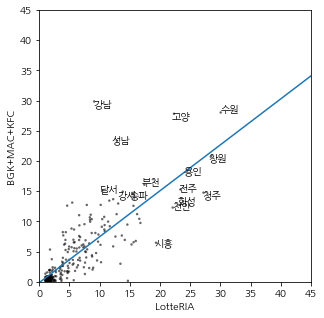

In [27]:
rcParams['font.family'] = 'NanumGothic'

# plt.rcParams["font.family"] = 'NanumBrush'
# plt.rcParams["font.size"] = 20
# plt.rcParams["figure.figsize"] = (14,4)

plt.figure(figsize=(5, 5))
r = lambda: np.random.random(len(bgt))
plt.scatter(bgt['L'] + r(), bgt['BMK'] + r(), s=6, c='black', edgecolor='none', alpha=0.6)
plt.xlabel('LotteRIA')
plt.ylabel('BGK+MAC+KFC')
plt.xlim(0, 45)
plt.ylim(0, 45)
plt.gca().set_aspect(1)

# 추세선 그린다.
trendfun = np.poly1d(np.polyfit(bgt['L'], bgt['BMK'], 1))
trendx = np.linspace(0, 45, 2)
plt.plot(trendx, trendfun(trendx))

# 튀는 점 몇 개는 이름도 표시한다.
tolabel = bgt[(bgt['L'] > 17) | (bgt['BMK'] >= 14)]
for idx, row in tolabel.iterrows():
    label_name = idx.split()[1][:-1]
    plt.annotate(label_name, (row['L'], row['BMK']))

Text(0, 0.5, '매장 수')

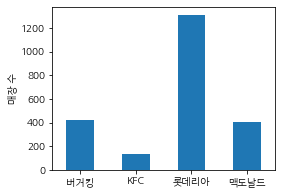

In [46]:
plt.figure(figsize=(4, 3))
subcnt = bgt[['B', 'K', 'L', 'M']]
subcnt.columns = ['버거킹', 'KFC', '롯데리아', '맥도날드']
p = subcnt.sum(axis=0).plot(kind='bar')
plt.setp(p.get_xticklabels(), rotation=0)
plt.ylabel('매장 수')

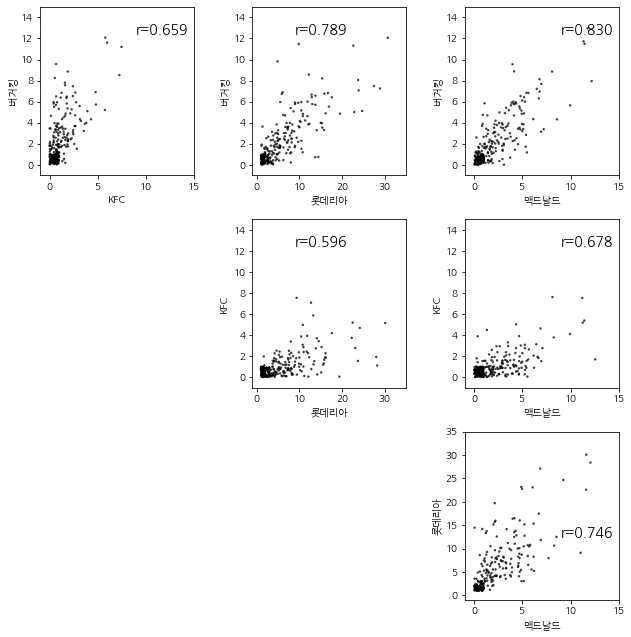

In [45]:
fig = plt.figure(figsize=(9, 9))

def plot_nstores(b1, b2, label1, label2):
    plt.scatter(bgt[b1] + np.random.random(len(bgt)),
                bgt[b2] + np.random.random(len(bgt)),
                edgecolor='none', alpha=0.75, s=6, c='black')
    plt.xlim(-1, 15 if b1 != 'L' else 35)
    plt.ylim(-1, 15 if b2 != 'L' else 35)
    plt.xlabel(label1)
    plt.ylabel(label2)
    
    r = scipy.stats.pearsonr(bgt[b1], bgt[b2])
    plt.annotate('r={:.3f}'.format(r[0]), (9, 12.5), fontsize=14)

bgbrands = [
    ('B', '버거킹'), ('K', 'KFC'),
    ('L', '롯데리아'), ('M', '맥드날드'),
]

for a in range(len(bgbrands) - 1):
    for b in range(1, len(bgbrands)):
        if a >= b:
            continue
        ax = fig.add_subplot(len(bgbrands)-1, len(bgbrands)-1, a * 3 + b)
        acol, alabel = bgbrands[a]
        bcol, blabel = bgbrands[b]
        plot_nstores(bcol, acol, blabel, alabel)

plt.tight_layout()